In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_comp_salary_17-18')

In [3]:
qbs.dtypes

NAME          object
COMP           int64
COMP_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,COMP,COMP_rank,salary
0,Drew Brees,386,1.0,24250000
1,Tom Brady,385,2.0,20500000
2,Matthew Stafford,371,3.0,27000000
3,Philip Rivers,360,4.5,20812500
4,Ben Roethlisberger,360,4.5,21850000


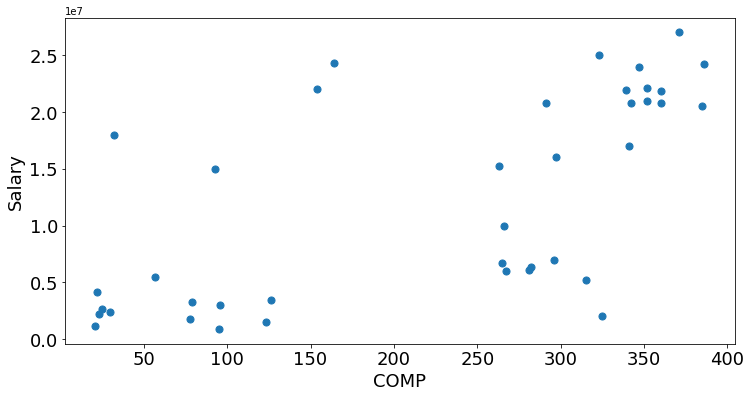

In [5]:
ax = qbs.plot(kind="scatter", x = 'COMP',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('COMP', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['COMP', 'salary']])

In [7]:
X.mean(axis = 0)

array([-3.41607085e-17, -2.27738056e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.22095218, -1.08037345],
       [ 0.59955197,  0.5596865 ],
       [ 0.51473376, -0.6876158 ],
       [-0.86088103,  0.85012431],
       [ 1.05262476,  1.16601496]])

In [11]:
km.predict(X)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 4, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,COMP,COMP_rank,salary,clusters
0,Drew Brees,386,1.0,24250000,4
1,Tom Brady,385,2.0,20500000,4
2,Matthew Stafford,371,3.0,27000000,4
3,Philip Rivers,360,4.5,20812500,4
4,Ben Roethlisberger,360,4.5,21850000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.45833333e+01, 2.65538175e+06],
       [2.98000000e+02, 1.72525000e+07],
       [2.87125000e+02, 6.15106487e+06],
       [1.10750000e+02, 1.98375000e+07],
       [3.56090909e+02, 2.26490394e+07]])

In [14]:
qbs.groupby('clusters')[['COMP', 'salary']].mean()

,COMP,salary
clusters,,
0,64.583333,2.655382e+06
1,298.000000,1.725250e+07
2,287.125000,6.151065e+06
3,110.750000,1.983750e+07
4,356.090909,2.264904e+07


In [15]:
centroids = qbs.groupby('clusters')[['COMP', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

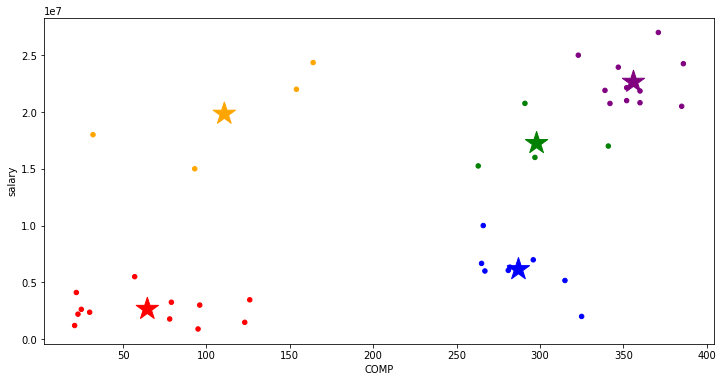

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'COMP', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'COMP', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

4.512833700818692

In [18]:
silhouette_score(X, km.labels_)

0.6064707752265882